In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

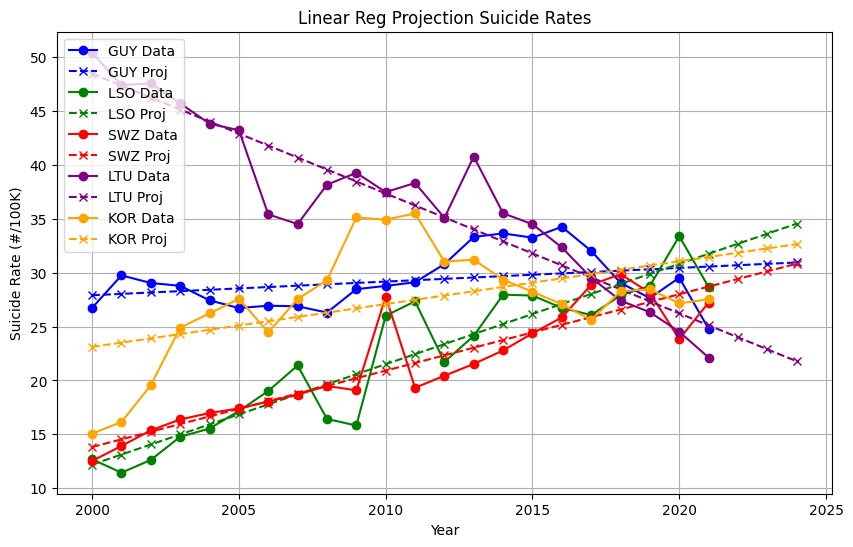

In [2]:
# Load csv file
df = pd.read_csv('data/SDGSUICIDE_sorted.csv')

countries = ['GUY', 'LSO', 'SWZ', 'LTU', 'KOR']
color_map = {
    'GUY': 'blue',
    'LSO': 'green',
    'SWZ': 'red',
    'LTU': 'purple',
    'KOR': 'orange'
}
models = {}
predictions = {}

# Initialize the plot
plt.figure(figsize=(10, 6))

for country in countries:
    # Filter data for the country
    country_data = df[df['SpatialDimensionValueCode'] == country]
    years = np.array([2000 + i for i in range(22)]).reshape(-1, 1)
    suicide_rates = np.array(country_data['NumericValue'])
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(years, suicide_rates)
    models[country] = model
    
    # Predicted future values
    future_years = np.array([2000 + i for i in range(25)]).reshape(-1, 1)
    predicted_rates = model.predict(future_years)
    predictions[country] = predicted_rates

    # Plot historical data
    plt.plot(years, suicide_rates, marker='o', linestyle='-', color=color_map[country], label=f'{country} Data')
    
    # Plot predicted data
    plt.plot(future_years, predicted_rates, marker='x', linestyle='--', color=color_map[country], label=f'{country} Proj')

# Enhance the plot with labels and legend
plt.xlabel('Year')
plt.ylabel('Suicide Rate (#/100K)')
plt.title('Linear Reg Projection Suicide Rates')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### ARIMA (AutoRegressive Integrated Moving Average)
- statistical method used for time series forecasting

c:\Users\aqwma\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\aqwma\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\aqwma\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


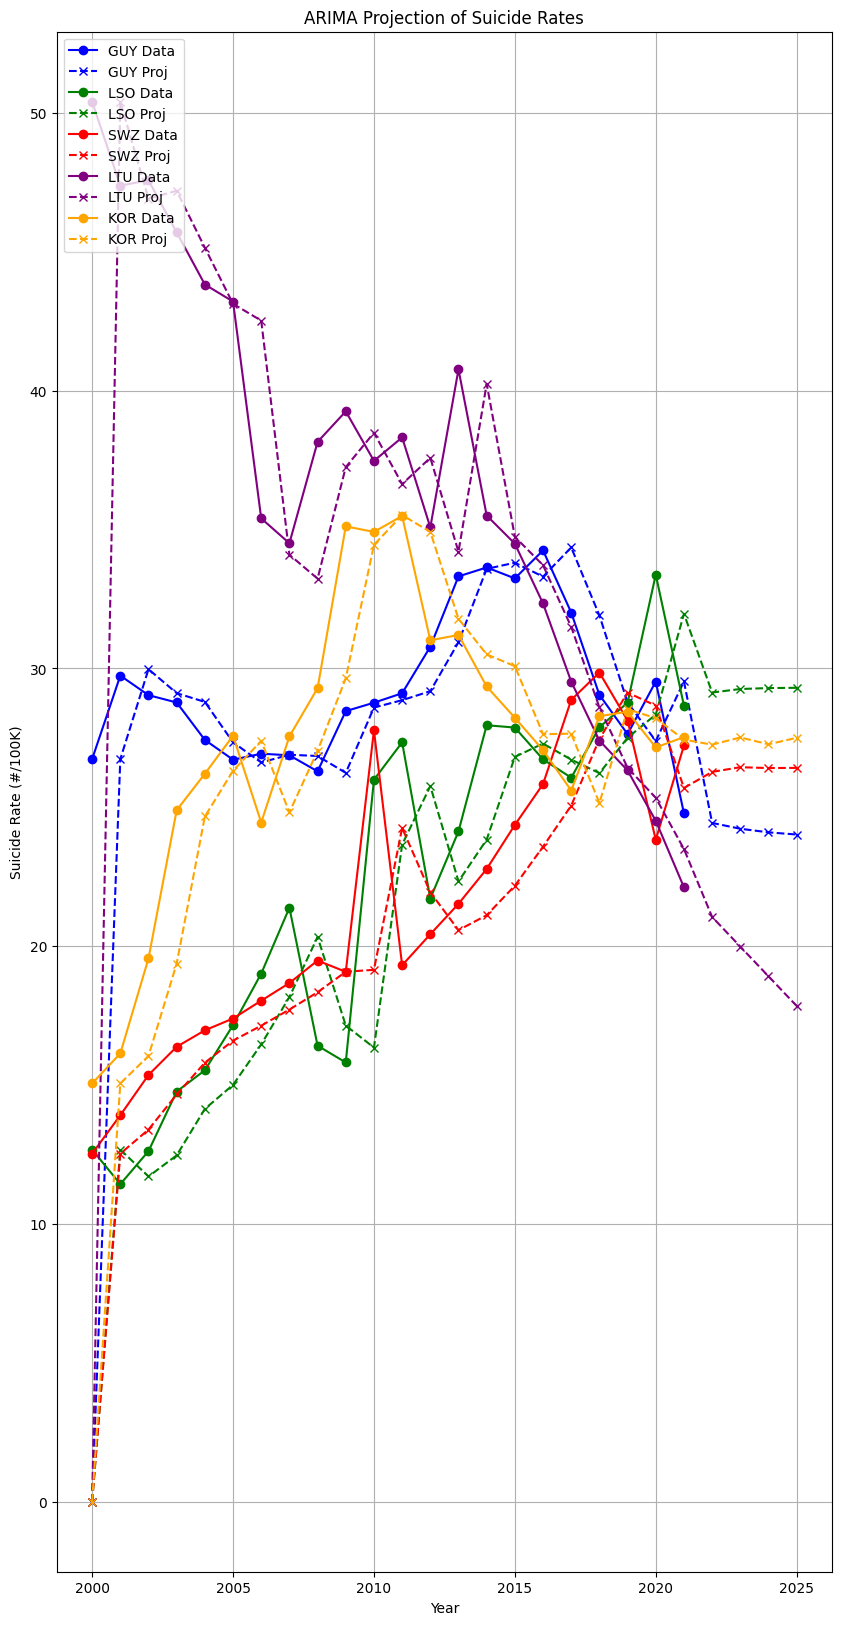

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load csv file
df = pd.read_csv('data/SDGSUICIDE_sorted.csv')
countries = ['GUY', 'LSO', 'SWZ', 'LTU', 'KOR']
color_map = {
    'GUY': 'blue',
    'LSO': 'green',
    'SWZ': 'red',
    'LTU': 'purple',
    'KOR': 'orange'
}
models = {}
predictions = {}
# Initialize the plot
plt.figure(figsize=(10, 20))

for country in countries:
    # Filter data for the country
    country_data = df[df['SpatialDimensionValueCode'] == country]
    years = np.array([2000 + i for i in range(22)]) 
    suicide_rates = np.array(country_data['NumericValue'])

    # Initialize and fit the ARIMA model (order can be adjusted based on data)
    model = ARIMA(suicide_rates, order=(1, 1, 1))
    model_fit = model.fit()

    models[country] = model_fit
    
    # Predicted values
    future_years = np.array([2000 + i for i in range(26)]) 
    predicted_rates = model_fit.predict(start=0, end=25, dynamic=False)
    predictions[country] = predicted_rates

    # Plot historical data
    plt.plot(years, suicide_rates, marker='o', linestyle='-', color=color_map[country], label=f'{country} Data')
    
    # Plot predicted data
    plt.plot(future_years, predicted_rates, marker='x', linestyle='--', color=color_map[country], label=f'{country} Proj')

# Enhance the plot with labels and legend
plt.xlabel('Year')
plt.ylabel('Suicide Rate (#/100K)')
plt.title('ARIMA Projection of Suicide Rates')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()